# Project Metro Interstate

Data visualization project.

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

In [26]:
!wget http://bioinf-mw.bihz.upwr.edu.pl/students-data/Metro_Interstate_Traffic_Volume.csv

--2023-04-18 09:47:58--  http://bioinf-mw.bihz.upwr.edu.pl/students-data/Metro_Interstate_Traffic_Volume.csv
Resolving bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)... 156.17.187.238
Connecting to bioinf-mw.bihz.upwr.edu.pl (bioinf-mw.bihz.upwr.edu.pl)|156.17.187.238|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3237208 (3.1M) [text/csv]
Saving to: ‘Metro_Interstate_Traffic_Volume.csv.1’

Metro_Interstate_Tr 100%[===================>]   3.09M   908KB/s    in 3.5s    

2023-04-18 09:48:02 (908 KB/s) - ‘Metro_Interstate_Traffic_Volume.csv.1’ saved [3237208/3237208]



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
dane = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [29]:
dane.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [30]:
dane.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [31]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [32]:
dane.describe(include ='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [33]:
dane['holiday'].value_counts()

None                         48143
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: holiday, dtype: int64

<Axes: >

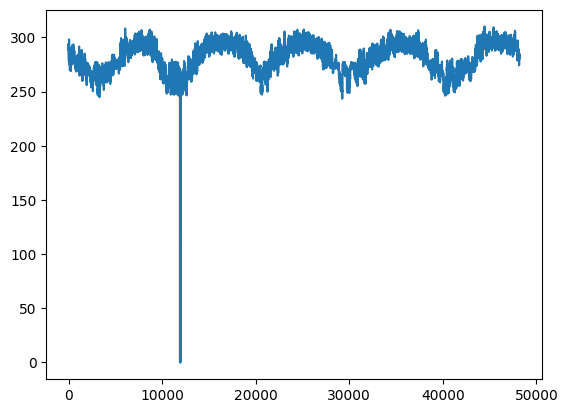

In [34]:
dane['temp'].plot()

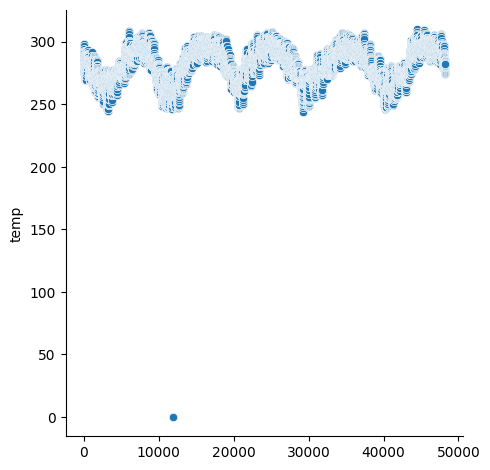

In [35]:
sns.relplot(data=dane['temp'])

Changing degrees Kelvin to degrees Celsius and deleting incorret data

In [36]:
dane['temp'].describe()

count    48204.000000
mean       281.205870
std         13.338232
min          0.000000
25%        272.160000
50%        282.450000
75%        291.806000
max        310.070000
Name: temp, dtype: float64

In [37]:
dane['temp']=(dane['temp'] - 273.15)
dane['temp'].describe()

count    48204.000000
mean         8.055870
std         13.338232
min       -273.150000
25%         -0.990000
50%          9.300000
75%         18.656000
max         36.920000
Name: temp, dtype: float64

In [49]:
dane = dane[dane['temp'] > -25]

In [50]:
dane['temp'].describe()

count    47350.000000
mean         8.667114
std         12.120142
min        -20.000000
25%         -0.530000
50%          9.800000
75%         18.790000
max         36.920000
Name: temp, dtype: float64

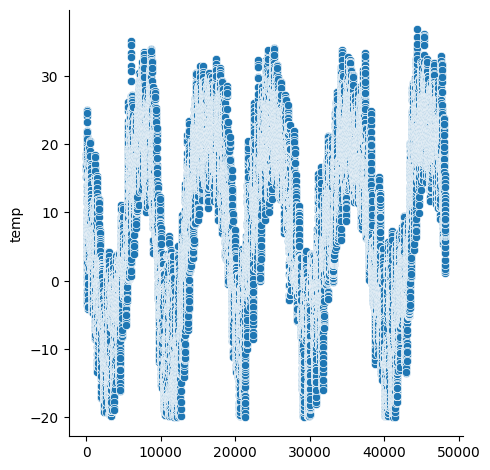

In [52]:
sns.relplot(data=dane['temp'])

<Axes: >

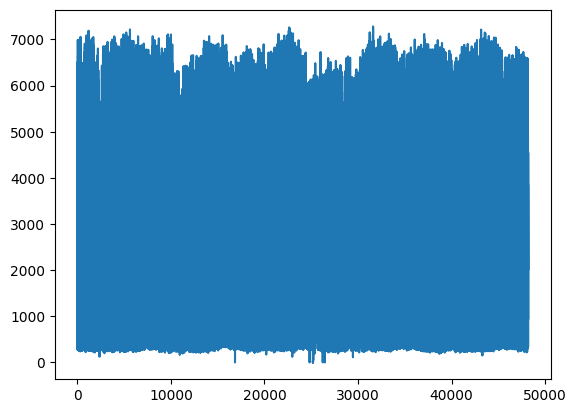

In [40]:
dane['traffic_volume'].plot()

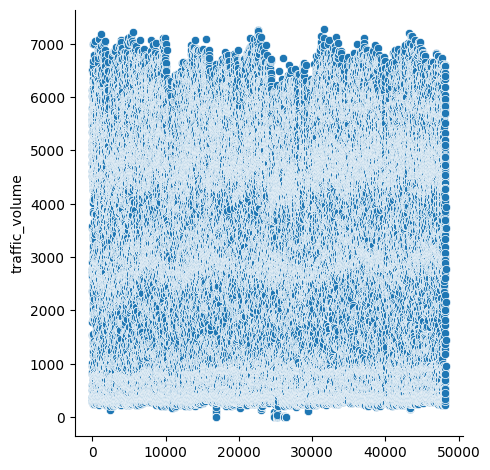

In [41]:
sns.relplot(data=dane['traffic_volume'])

In [42]:
dane['traffic_volume'].describe(include='all')

count    47350.000000
mean      3273.897254
std       1986.061110
min          0.000000
25%       1215.000000
50%       3405.000000
75%       4943.000000
max       7280.000000
Name: traffic_volume, dtype: float64

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data. 

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [53]:
dane['date_time'] = pd.to_datetime(dane['date_time'])

In [55]:
dane_daytime = dane[(dane['date_time'].dt.hour >= 7) & (dane['date_time'].dt.hour <= 19)]

In [59]:
dane_nighttime = dane[(dane['date_time'].dt.hour < 7) | (dane['date_time'].dt.hour > 19)] 

Some data visualization

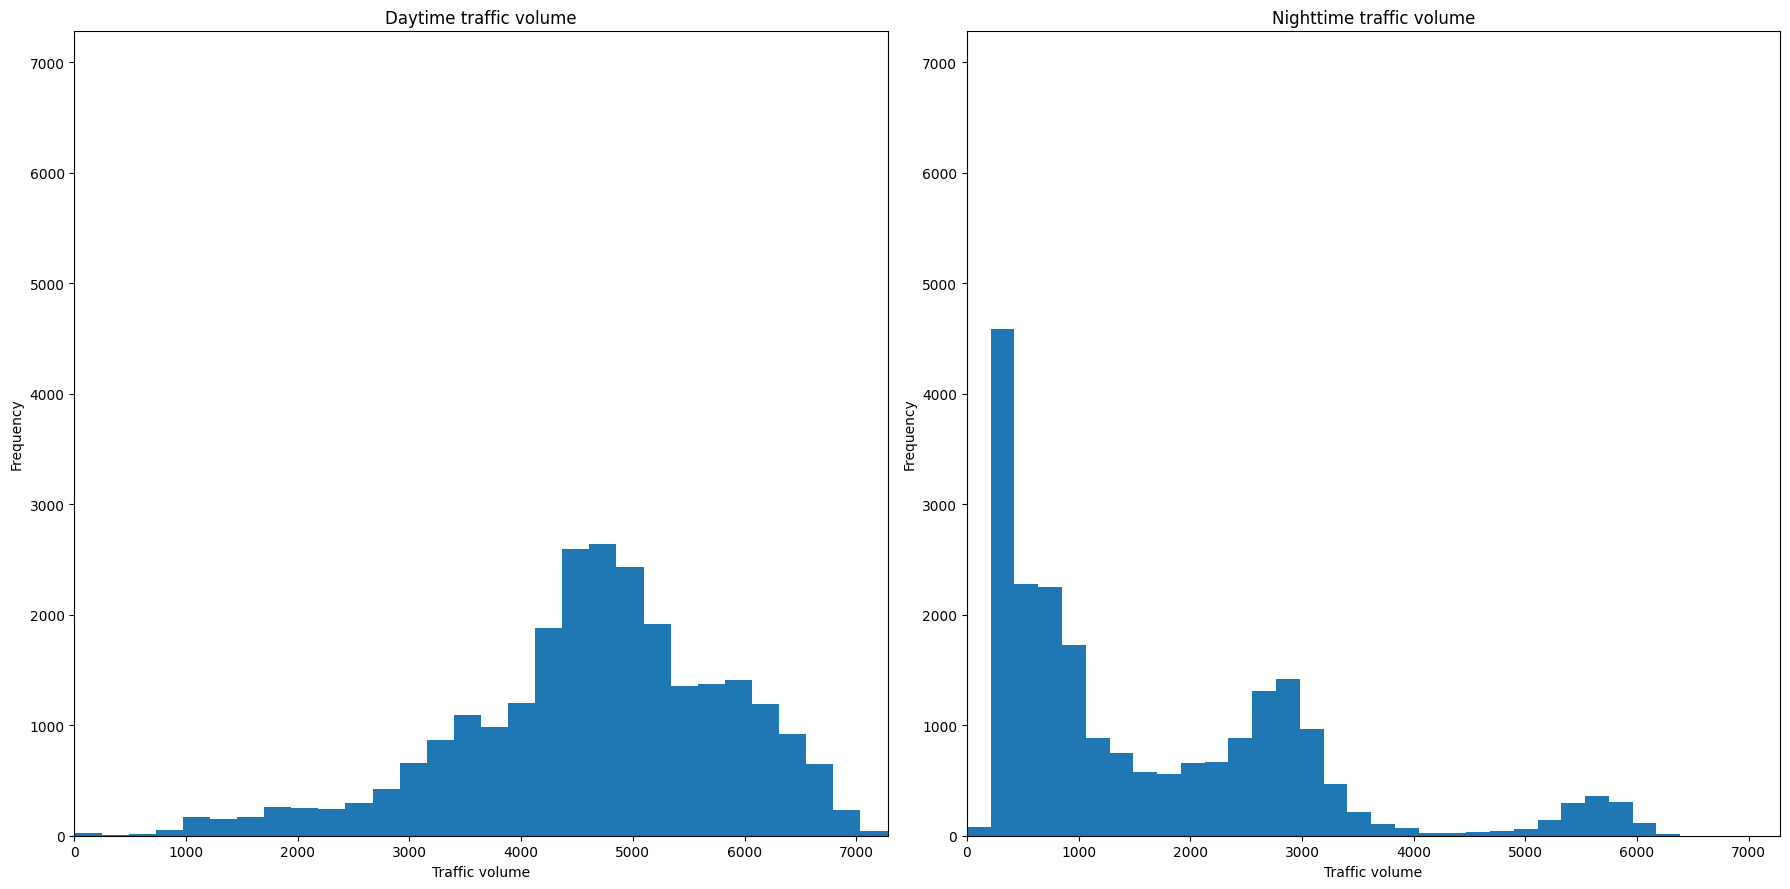

In [77]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
plt.hist(dane_daytime['traffic_volume'], bins=30)
plt.title('Daytime traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(0, max(dane['traffic_volume'])) 
plt.ylim(0, max(dane['traffic_volume'])) 

plt.subplot(1, 2, 2)
plt.hist(dane_nighttime['traffic_volume'], bins=30)
plt.title('Nighttime traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(0, max(dane['traffic_volume'])) 
plt.ylim(0, max(dane['traffic_volume'])) 

plt.tight_layout()
plt.show()

Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward. 

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

In [78]:
dane_daytime['month'] = dane_daytime['date_time'].dt.month

<ipython-input-78-400c3da3122b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_daytime['month'] = dane_daytime['date_time'].dt.month


In [79]:
dane_daytime.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10


In [85]:
by_month = dane_daytime.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-85-cfd4ff46e8ad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = dane_daytime.groupby('month').mean()


month
1     4420.506085
2     4596.911038
3     4767.442886
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4297.357462
Name: traffic_volume, dtype: float64

<Axes: xlabel='month'>

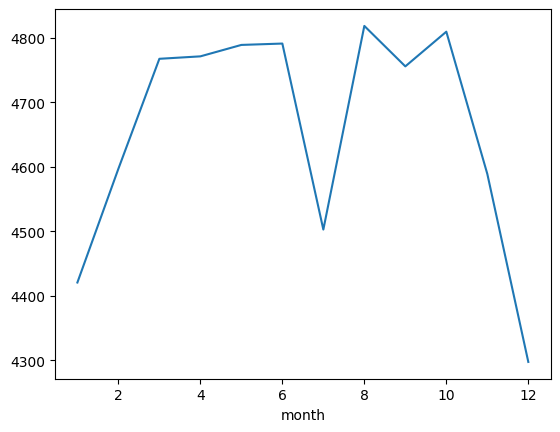

In [87]:
by_month['traffic_volume'].plot.line()

In the months of November, December, January, February and July there is less traffic.

In [88]:
dane_daytime['dayofweek'] = dane_daytime['date_time'].dt.dayofweek

<ipython-input-88-c8ddcb226744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_daytime['dayofweek'] = dane_daytime['date_time'].dt.dayofweek


In [92]:
dane_daytime['dayofweek']
by_dayofweek = dane_daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

<ipython-input-92-109db7957982>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = dane_daytime.groupby('dayofweek').mean()


dayofweek
0    4759.620507
1    5043.195225
2    5147.452569
3    5167.415146
4    5162.006910
5    3891.021751
6    3425.359522
Name: traffic_volume, dtype: float64

<Axes: xlabel='dayofweek'>

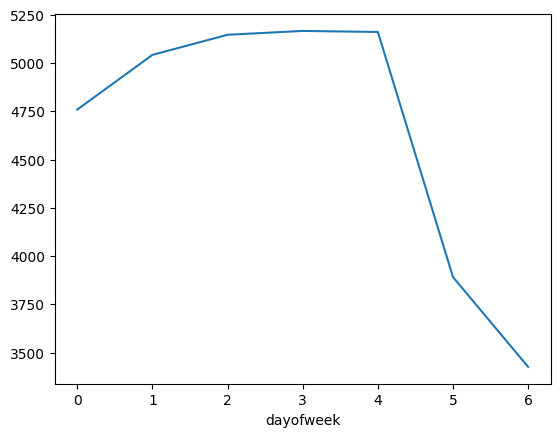

In [94]:
by_dayofweek['traffic_volume'].plot.line()

The highest traffic volume is on days from Monday to Friday (bussiness days). 

Since we are looking into days, when the traffic is the highest, we will divide the data into bussiness days and weeknd.

In [95]:
dane_daytime['hour'] = dane_daytime['date_time'].dt.hour 

<ipython-input-95-339b8c3e9894>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_daytime['hour'] = dane_daytime['date_time'].dt.hour


In [96]:
bussiness_days = dane_daytime.copy()[dane_daytime['dayofweek'] <= 4] # 4 == Friday
weekend = dane_daytime.copy()[dane_daytime['dayofweek'] >= 5] # 5 == Saturday

In [98]:
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

<ipython-input-98-dc1e9b3bd8ee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
<ipython-input-98-dc1e9b3bd8ee>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


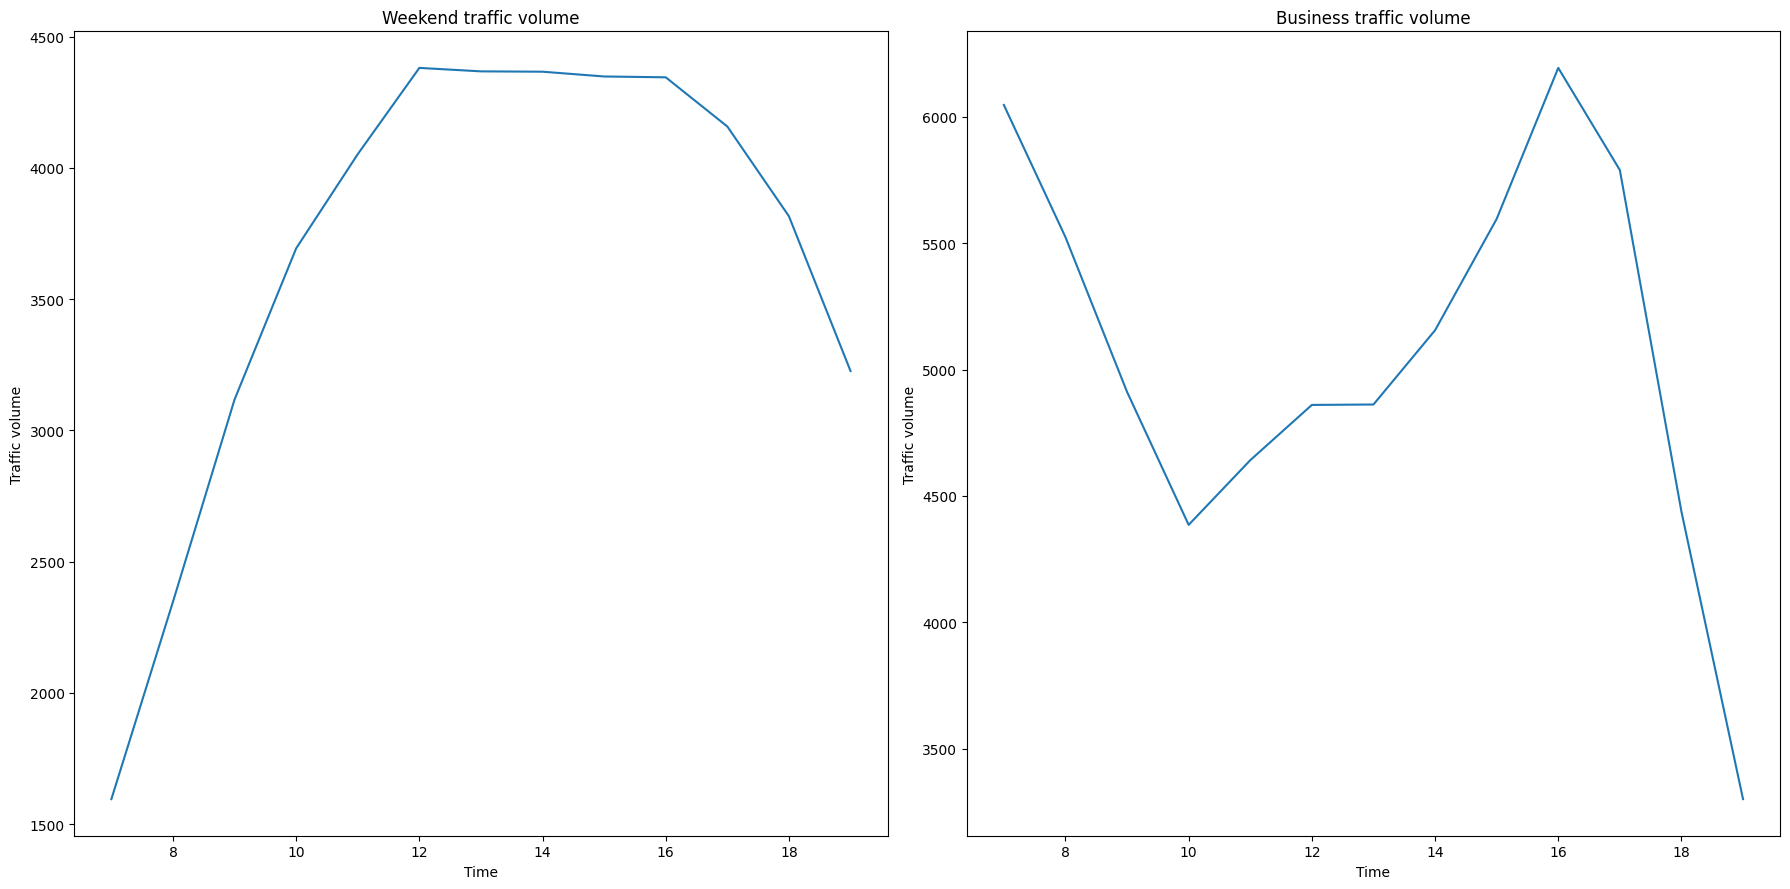

In [100]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend traffic volume')
plt.xlabel('Time')
plt.ylabel('Traffic volume')

plt.subplot(1, 2, 2)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business traffic volume')
plt.xlabel('Time')
plt.ylabel('Traffic volume')

plt.tight_layout()
plt.show()

On the weekend, the traffic is increasing from morning untill midday (12.p.m), then it maintains the volume and starts decrasing about 4 p.m.

On bussiness days, the traffic is high in the morning but it is constantly decresing untill 10 a.m. when it starts to increase. The highest traffic volume is around 5 p.m. but then there is a sudden drop of traffic.

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.
Another possible indicator of heavy traffic is weather.

In [101]:
dane.loc[:, ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

temp              0.123002
rain_1h           0.004705
snow_1h           0.000546
clouds_all        0.061079
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

Strongest correlation of traffic volumne occurs with temp. Nevertheless correlation = 0.123 indicaties rather weak correlation.

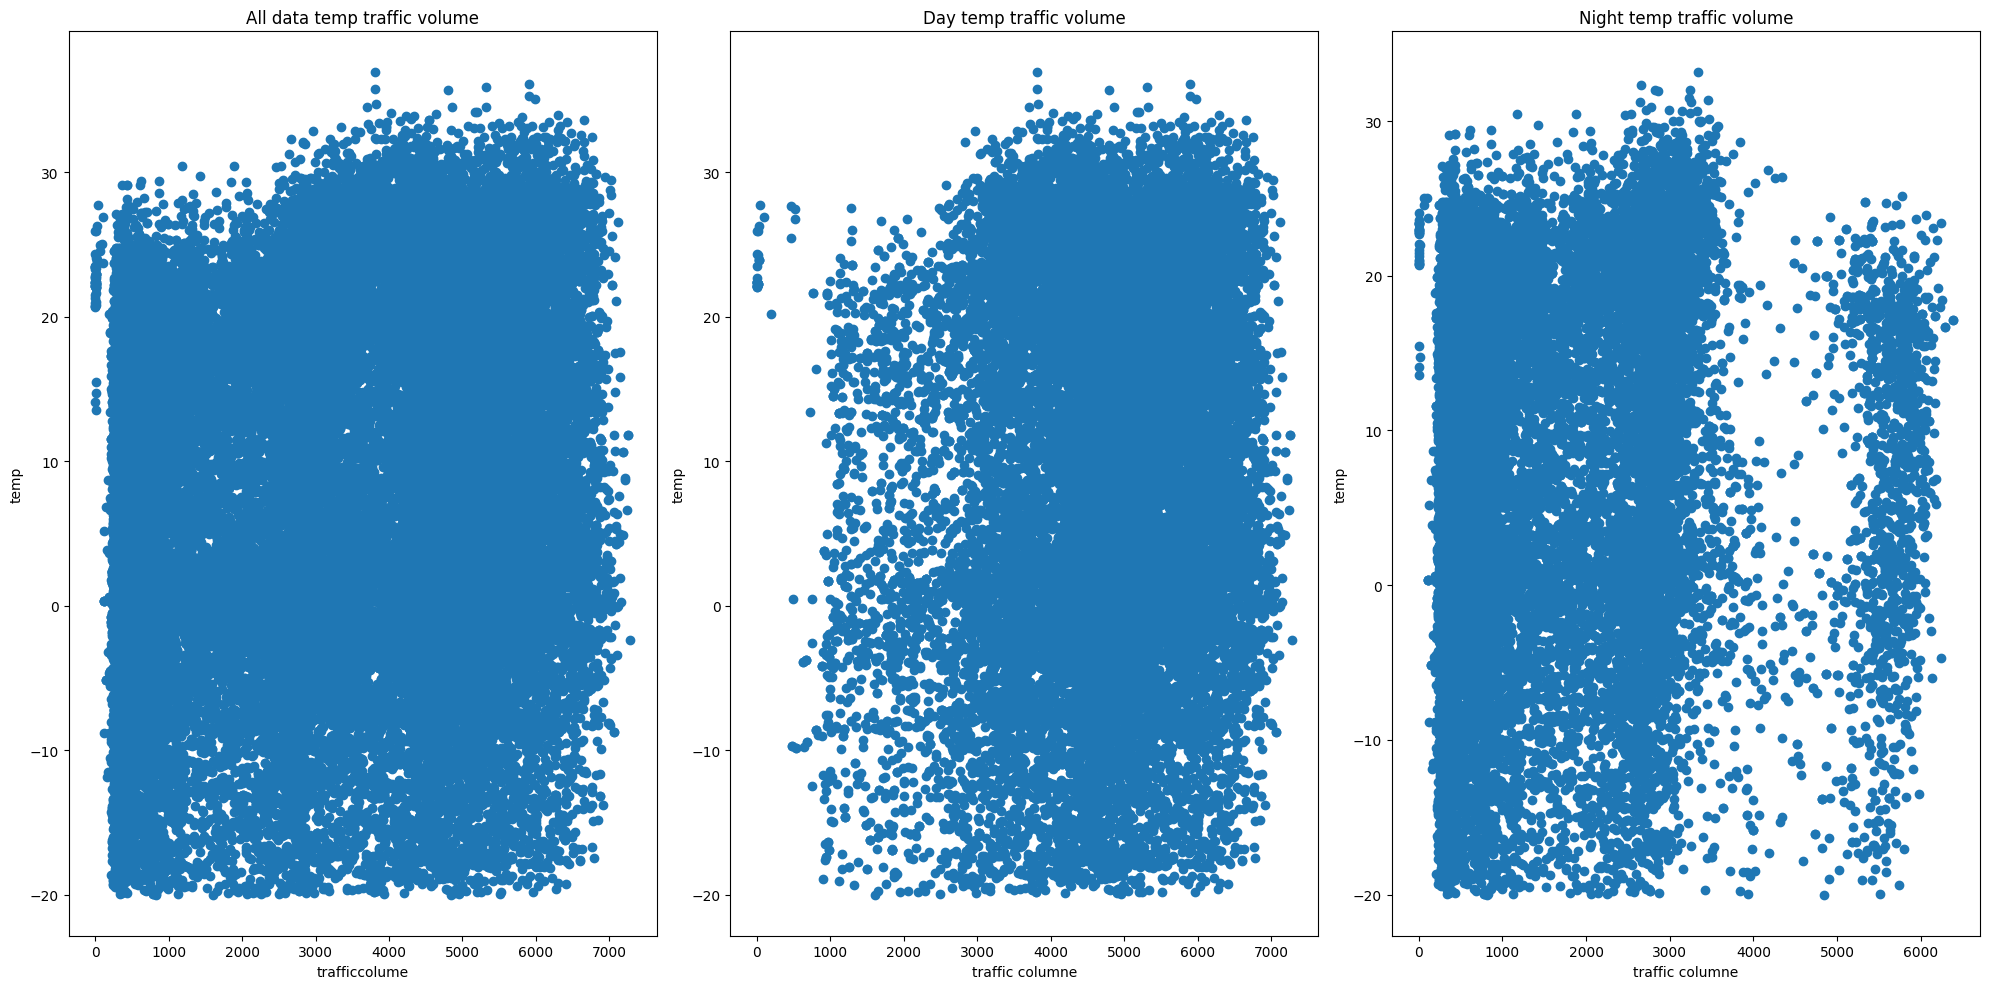

In [108]:
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 1)
plt.scatter(dane['traffic_volume'], dane['temp'])
plt.title('All data temp traffic volume')
plt.xlabel('trafficcolume')
plt.ylabel('temp')

plt.subplot(1, 3, 2)
plt.scatter(dane_daytime['traffic_volume'], dane_daytime['temp'])
plt.title('Day temp traffic volume')
plt.xlabel('traffic columne')
plt.ylabel('temp')

plt.subplot(1, 3, 3)
plt.scatter(dane_nighttime['traffic_volume'], dane_nighttime['temp'])
plt.title('Night temp traffic volume')
plt.xlabel('traffic columne')
plt.ylabel('temp')

plt.tight_layout()

During the day, there is higher traffic volume at all temperatures, while at night, traffic volume is lower (also at all temperatures)

We will group our data by weather.

In [110]:
by_weather_main = dane.groupby('weather_main').mean()

<ipython-input-110-3197945cee6c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = dane.groupby('weather_main').mean()


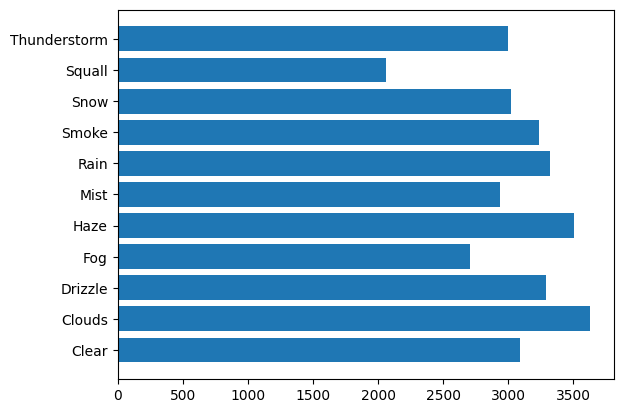

In [112]:
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.show()

The highest traffic volume occurs with weather like 'Clouds' and 'Haze', the lowest is when it's 'Squall'

In [113]:
by_weather_desc = dane_daytime.groupby('weather_description').mean()

<ipython-input-113-e40f06da18a6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_desc = dane_daytime.groupby('weather_description').mean()


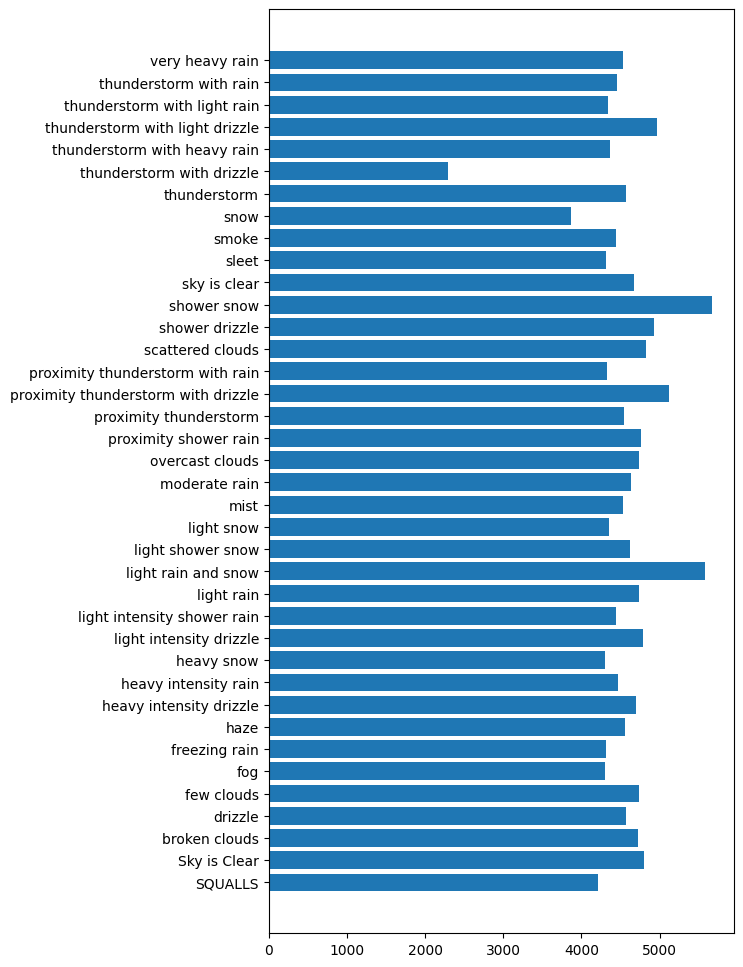

In [114]:
plt.figure(figsize=(6,12))
plt.barh(by_weather_desc.index, by_weather_desc['traffic_volume'])
plt.show()

From more precise description we can learn that the most traffic occurs when it's 'light rain ans snow' and 'shower snow'

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.

Weather indicators
* Shower snow
* Light rain and snow